In [95]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style 
import pandas as pd
import pandas_datareader.data as web

style.use ('ggplot')

In [41]:
#start = dt.datetime(2000, 1, 1)
#end = dt.datetime (2020, 12, 31)

In [63]:
df = web.DataReader ('XOM', 'yahoo', start, end)
print (df.tail(1000))
df.to_csv('xom.csv')
df.tail(100)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2016-10-28  86.360001  84.139999  85.279999  84.779999  19072200.0  70.351227
2016-10-31  84.400002  82.989998  83.879997  83.320000  16663800.0  69.139687
2016-11-01  83.919998  83.269997  83.500000  83.650002  13050600.0  69.413544
2016-11-02  83.879997  82.940002  83.300003  83.449997  11226100.0  69.247574
2016-11-03  83.879997  83.050003  83.680000  83.660004   8836500.0  69.421844
...               ...        ...        ...        ...         ...        ...
2020-10-13  34.869999  34.099998  34.730000  34.220001  20995100.0  34.220001
2020-10-14  34.830002  34.029999  34.060001  34.150002  17756500.0  34.150002
2020-10-15  34.459999  33.270000  33.700001  34.450001  23251600.0  34.450001
2020-10-16  34.639999  33.880001  34.369999  34.099998  22627200.0  34.099998
2020-10-19  34.369999  33.389999  34.099998  33.419998  22525055

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-29,45.689999,44.369999,44.820000,45.470001,25886200.0,44.590328
2020-06-01,46.450001,44.799999,45.320000,46.279999,19031000.0,45.384655
2020-06-02,47.450001,46.750000,46.860001,47.310001,22319000.0,46.394730
2020-06-03,49.400002,47.950001,48.000000,49.240002,23418000.0,48.287392
2020-06-04,49.150002,48.160000,48.880001,49.099998,18731400.0,48.150097
...,...,...,...,...,...,...
2020-10-13,34.869999,34.099998,34.730000,34.220001,20995100.0,34.220001
2020-10-14,34.830002,34.029999,34.060001,34.150002,17756500.0,34.150002
2020-10-15,34.459999,33.270000,33.700001,34.450001,23251600.0,34.450001


In [ ]:
#df.to_csv()

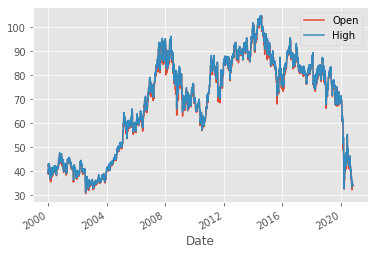

In [68]:
df = pd.read_csv('xom.csv', parse_dates= True, index_col=0)
#print(df.head(100)) 
df[['Open', 'High',]].plot()
plt.show()

In [80]:
df ['100ma'] = df['Adj Close']. rolling(window=100).mean()
#df.dropna(inplace = True)
print(df.tail(10))

                 High        Low       Open  ...      Volume  Adj Close      100ma
Date                                         ...                                  
2020-10-06  34.419998  33.310001  34.119999  ...  26731800.0  33.389999  41.922445
2020-10-07  33.740002  33.209999  33.639999  ...  23779300.0  33.500000  41.845570
2020-10-08  35.340000  33.759998  33.880001  ...  34413700.0  35.259998  41.753542
2020-10-09  35.950001  34.650002  35.680000  ...  29228600.0  34.740002  41.670043
2020-10-12  34.730000  34.230000  34.540001  ...  17912800.0  34.630001  41.571420
2020-10-13  34.869999  34.099998  34.730000  ...  20995100.0  34.220001  41.476641
2020-10-14  34.830002  34.029999  34.060001  ...  17756500.0  34.150002  41.380769
2020-10-15  34.459999  33.270000  33.700001  ...  23251600.0  34.450001  41.275051
2020-10-16  34.639999  33.880001  34.369999  ...  22627200.0  34.099998  41.162597
2020-10-19  34.369999  33.389999  34.099998  ...  22525055.0  33.419998  41.055110

[10

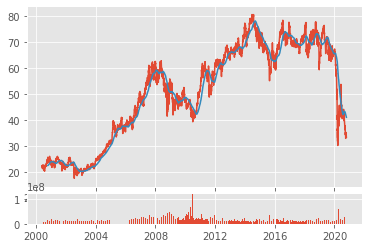

In [82]:
ax1 = plt.subplot2grid((6, 1), (0,0), rowspan = 5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan = 1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()